In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno

In [2]:
# Load the data
data = pd.read_csv('Consumo_cerveja.csv')
data.columns=["date", "temp_medio", "temp_min", "temp_max", "rain", "weekend", "consumption"]
data.head()

,date,temp_medio,temp_min,temp_max,rain,weekend,consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
data.shape

(941, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   temp_medio   365 non-null    object 
 2   temp_min     365 non-null    object 
 3   temp_max     365 non-null    object 
 4   rain         365 non-null    object 
 5   weekend      365 non-null    float64
 6   consumption  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


# Missing data 

<AxesSubplot:>

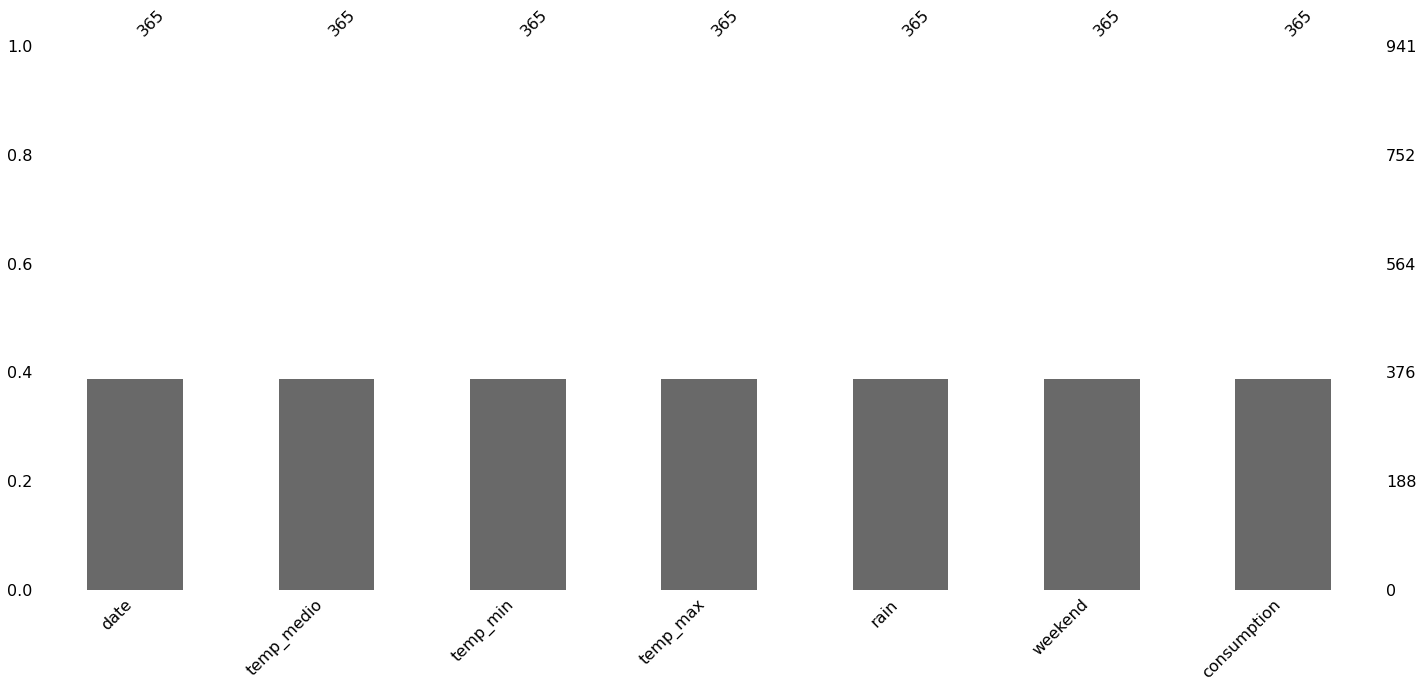

In [5]:
msno.bar(data)

In [6]:
data.isnull().mean() * 100

date           61.211477
temp_medio     61.211477
temp_min       61.211477
temp_max       61.211477
rain           61.211477
weekend        61.211477
consumption    61.211477
dtype: float64

#### Here we have 61% data missing we will drop them as we can't use them for prediction

In [7]:
data.dropna(axis = 'rows', inplace = True)

<AxesSubplot:>

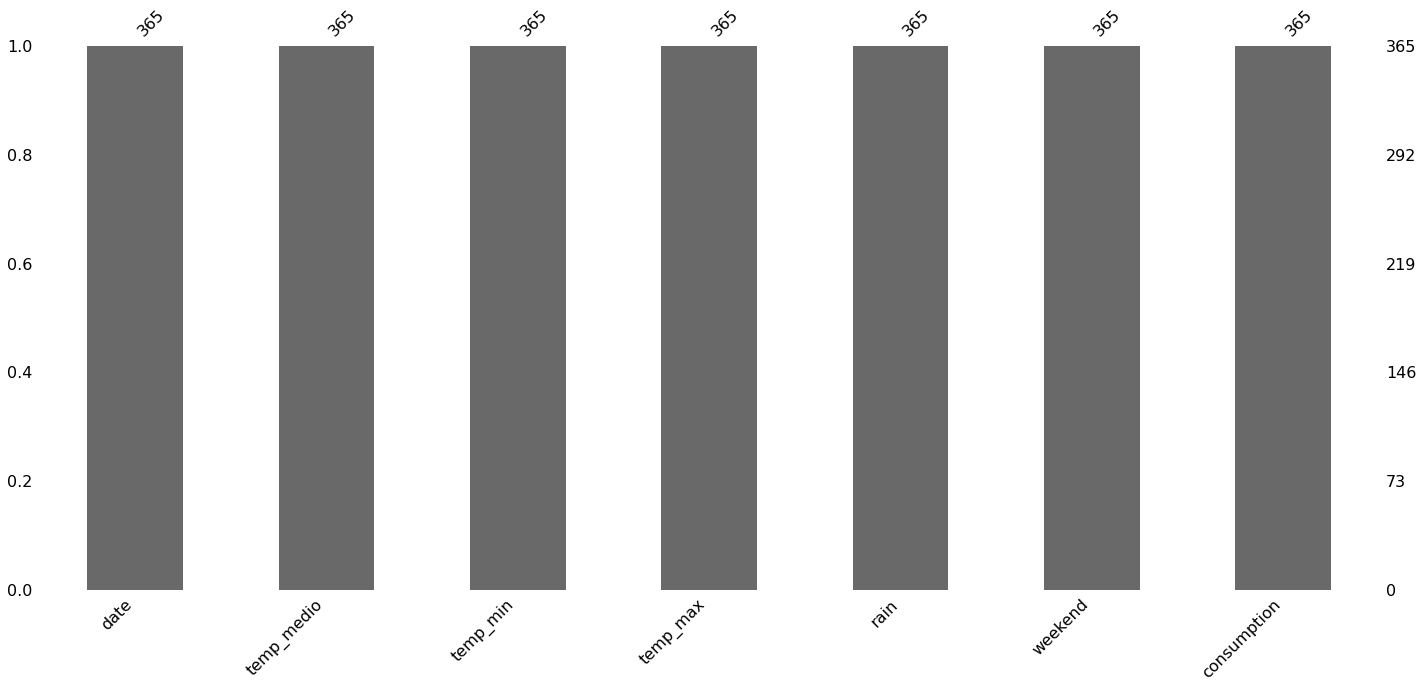

In [8]:
msno.bar(data)

#### Replace the ',' with '.' for numeric columns

In [9]:
features = ["temp_medio", "temp_min", "temp_max", "rain"]
for column in features:
    data[column] = data[column].apply(lambda x : np.float(re.sub(r',', '.', x)))

In [10]:
data.head()

,date,temp_medio,temp_min,temp_max,rain,weekend,consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [11]:
# Create date feature 
data['date'] = pd.to_datetime(data['date'])
# data['Month'] = data['date'].dt.month
# data['Day'] = data['date'].dt.day
data.drop(['date'], axis = 'columns', inplace = True)

<AxesSubplot:>

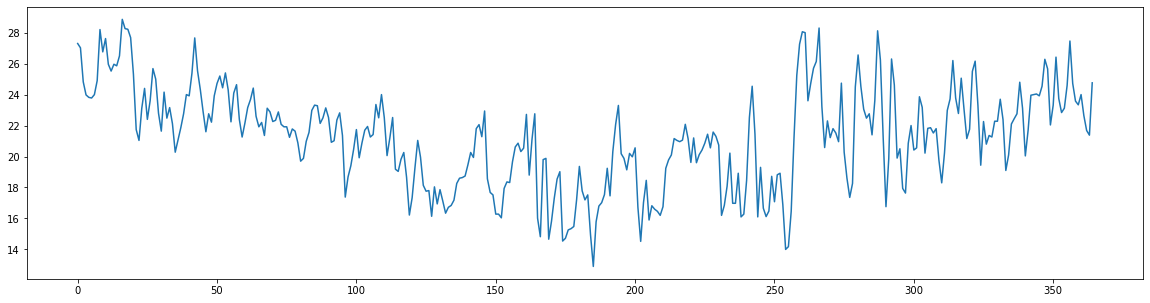

In [12]:
plt.rcParams['figure.figsize'] = (20,5)
data['temp_medio'].plot()

<AxesSubplot:>

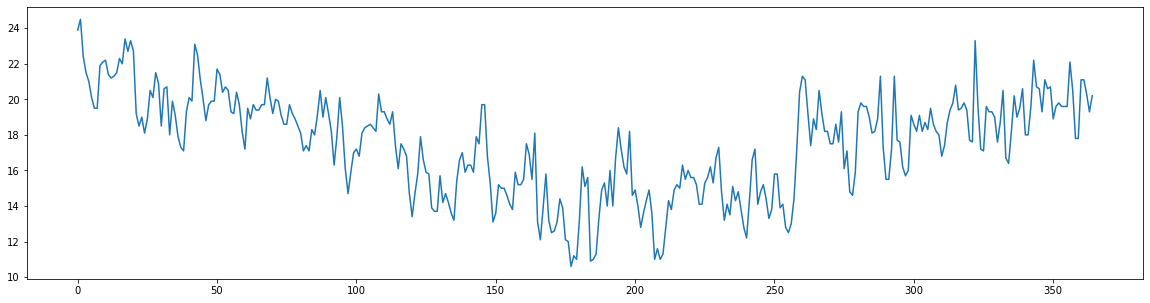

In [13]:
plt.rcParams['figure.figsize'] = (20,5)
data['temp_min'].plot()

<AxesSubplot:>

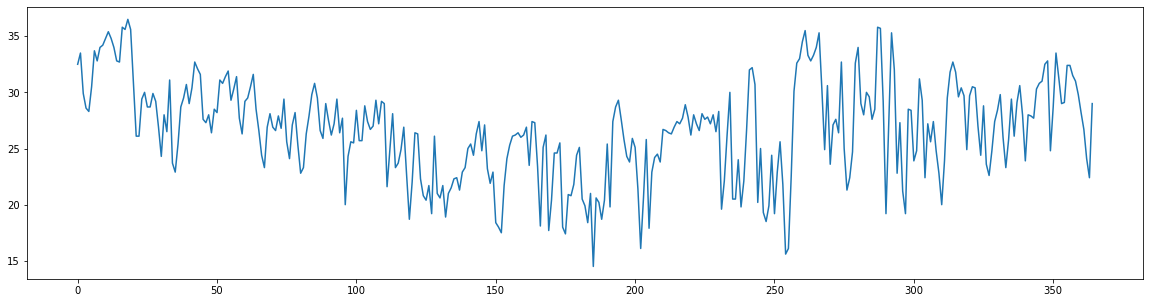

In [14]:
plt.rcParams['figure.figsize'] = (20,5)
data['temp_max'].plot()

<AxesSubplot:xlabel='weekend', ylabel='consumption'>

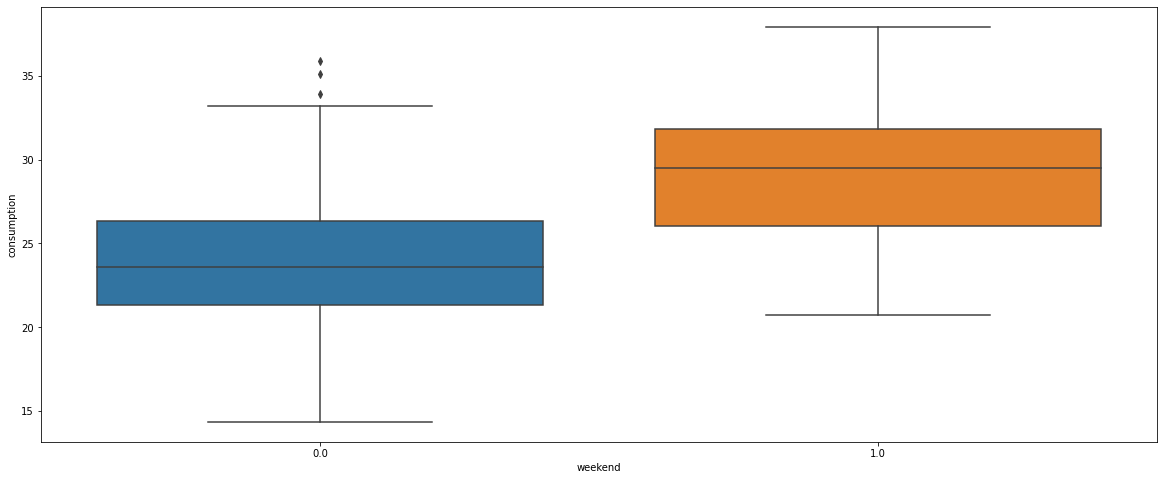

In [15]:
plt.rcParams['figure.figsize'] = (20,8)
sns.boxplot(x = data['weekend'], y = data['consumption'])

#### We see in weekend consumption is more

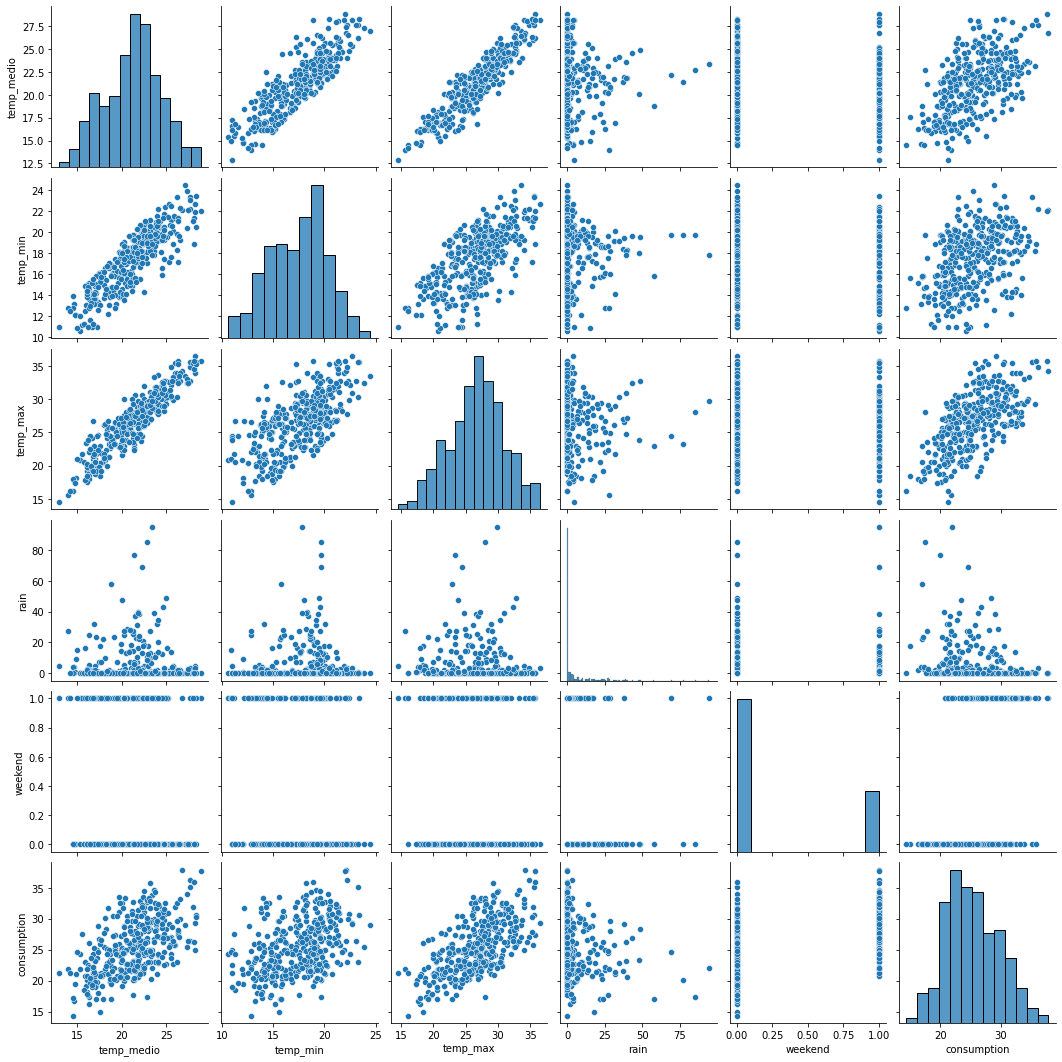

In [16]:
sns.pairplot(data)

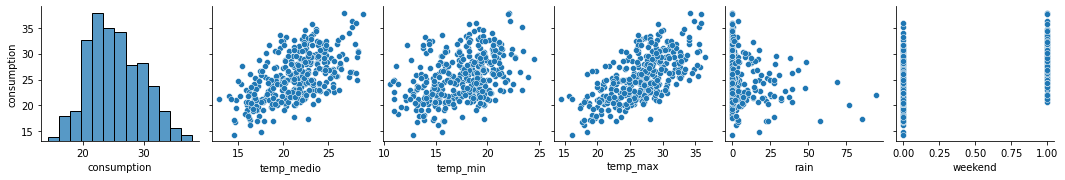

In [17]:
sns.pairplot(data, y_vars = 'consumption', x_vars = ["consumption","temp_medio", "temp_min", "temp_max", "rain", "weekend"])

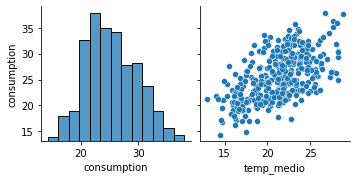

In [18]:
sns.pairplot(data, y_vars = 'consumption', x_vars = ["consumption","temp_medio"])

D:\Program Files\Anaconda\envs\MallCustomer-Clustering\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='consumption', ylabel='Density'>

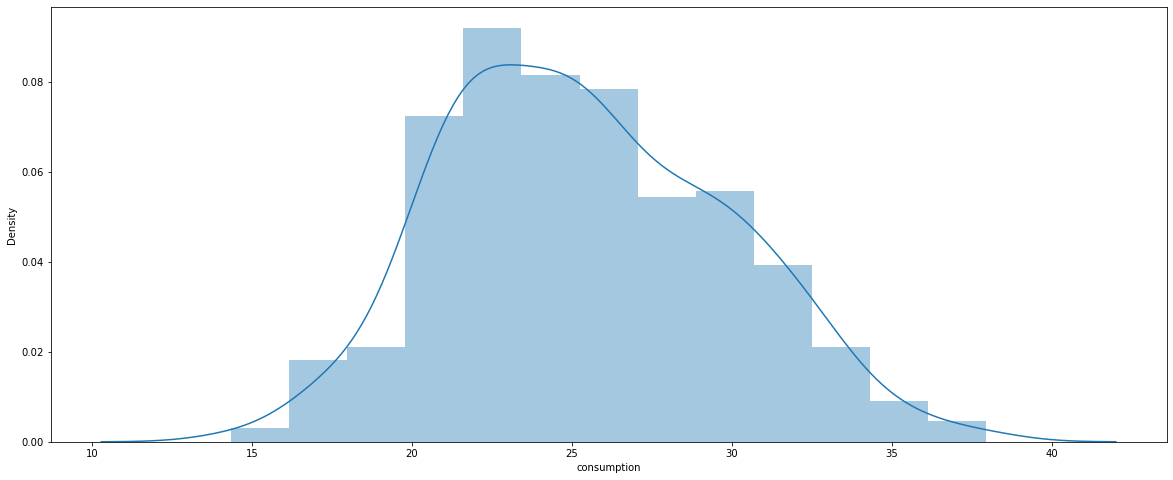

In [30]:
sns.distplot(data['consumption'])

<AxesSubplot:>

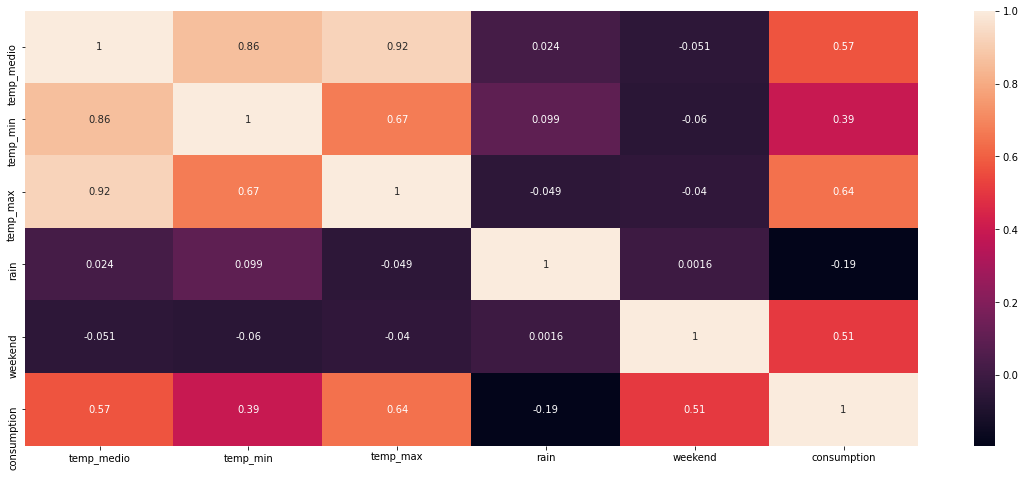

In [19]:
sns.heatmap(data.corr(), annot = True)

In [20]:
# Independent & Dependent feature
X = data.drop(['consumption'], axis = 1)
y = data['consumption']

In [21]:
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
count = len(X.columns)
print(count)
vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                          for i in range(count)] 
print(vif_data.sort_values(by = 'VIF', ascending = False))

5
     features          VIF
0  temp_medio  1087.797835
2    temp_max   436.529190
1    temp_min   249.112601
4     weekend     1.374283
3        rain     1.220276


In [22]:
X = data.drop(['rain','weekend','temp_max','temp_medio'], axis = 1)
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
count = len(X.columns)
print(count)
vif_data['VIF'] = [variance_inflation_factor(X.values, i) 
                          for i in range(count)] 
print(vif_data.sort_values(by = 'VIF', ascending = False))

2
      features        VIF
0     temp_min  30.409786
1  consumption  30.409786


In [23]:
# Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print('Linear Regression : R2 score : ', r2_score(y_test, y_pred))

R2 score :  1.0


In [25]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
# print('R2 score : ', r2_score(y_test, y_pred))
print('Random Forest : R2 score : ', r2_score(y_test, y_pred))

R2 score :  0.9998575609179448


In [28]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
# print('R2 score : ', r2_score(y_test, y_pred))
print('Ridge Regression: R2 score : ', r2_score(y_test, y_pred))

Ridge Regression: R2 score :  0.9999999395312512


<AxesSubplot:xlabel='consumption'>

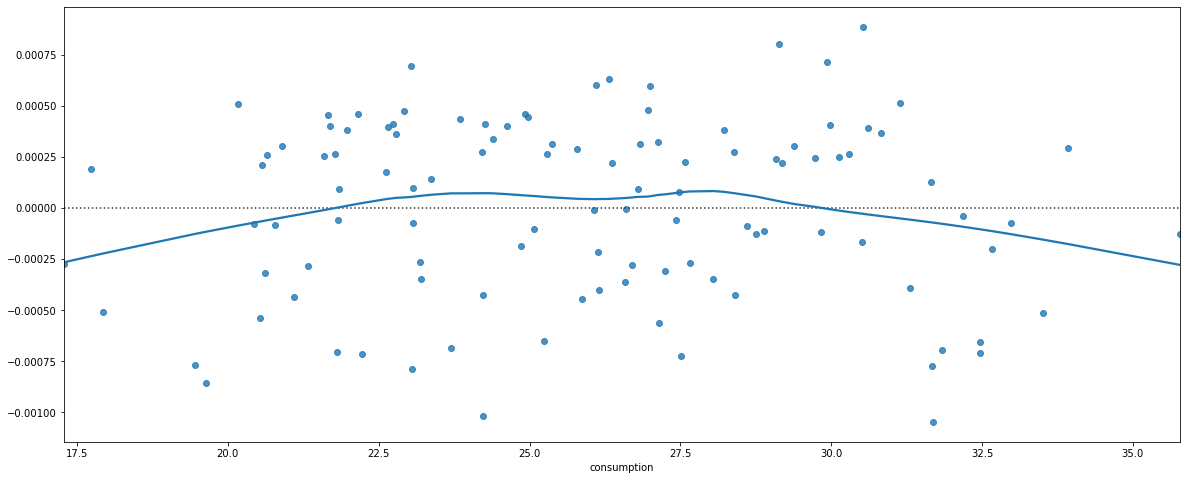

In [27]:
sns.residplot(x = y_test, 
              y = y_pred, 
              lowess = True) 